# Data Visualizations

Michael Fudge 2024 Edition


### Table of Contents:

1. What is a Data Visualization?
2. Anatomy of a Visualization.
3. Seaborn: Barplot
4. Seaborn: Lineplot
5. Seaborn: Scatterplot / lmplot
6. Seaborn: Histplot
7. IPywidgets and Seaborn
8. Folium: Mapping
9. IPywidgets and folium


## What is a Data Visualization?

Data visualization are graphical representations of your data. These graphical representations can be charts, graphs, plots or maps. As the old adage goes, "a picture is worth 1,000 words."

### Libraries for Visualizations in Python 

Python has some amazing libraries to help create visuals. In this unit we will introduce two of the more the fundamental libraries and keep the feature set simple. 

- `seaborn` a library for statistical visualizations
- `folium` a library for maps

### Keeping things simple

Since we have limitied time to cover visualizations, we will keep things simple. We will restrict visualizations to Pandas data only, and keep most activities to a single line of code. What important is focusing on the **concepts** not the actual code. The code changes, the concepts do not!!!

### Want more?

There's only one unit on Data Visualization, and theoretally we could probably teach an entire course in this subject. Wait! We do its IST419!


## Anatomy of a Visual

Its obvious that Data Visualizations consist of **data**! What's important is how the data are displayed. 

For example take home pricing data. By itself not useful, but when you add some **dimensions** it gets more interesting. For example you might want to look at home prices over time for New York (NY) and New Jersey (NJ). The example has **two dimensions** time, and state (NY/NJ). 

In addition, sometimes we want an **aggregation** for our data instead of the actual points. For example, looking at actual home prices might be too much information to process, but **average** home prices might be easier to process. The average is an aggregation of the raw data points of home prices.

### Common elements for displaying a visual.

- Our visual exists on a **canvas**. The canvas is the layout or surface for the visual.
- At minimum the canvas displays two dimensions. It can have three or more.
    - First dimension is on the horizontal, called the **X-Axis**. This axis will have a categories like student major or a time dimension like year. 
    - The 2nd dimension is on the vertical, called the **Y-Axis**. This axis has the data we want to measure, such as test scores or home sales.
    - The 3rd dimension is in the **legend**. This is always categorical and allows us to display multiple measurments for each category.
- The **data points** are plotted on the canvas. For each intersection of X,Y and legend we will have a data point. All of the X/Y values for the same legend are called a series. For example one series could be New York home prices over time, and the other series could be New Jersey home prices.

### Ways to visualize a series

There are several ways to visualize a series. Here we focus on 3:

- Points are used to compare two numerical quantities on the X/Y. This is called a **scatter** plot.
- Bars are used to compare quantities in a category. This is called a **bar** plot.
- Lines are used to show a relationship between X axis values, such as time. This is called a **line** plot. 

### Example Visualization

The following example plots average sales. There are 3 **series**. One for Widgets, Doodads, and Niknaks respectively. On the **X-Axis** is a time dimension, Months. Because of this a **line plot** is the appropriate visualization. The **Y-Axis** shows our measure, average sales. Each break in the line is a **data point**. 

A picture is truly worth 1,000 words! The lines helps us to easily see trends:

- Sales of Doodads are decreasing over time
- Sales of Widgets are increasing over time
- Sometime betwem Feb and Mar, sales of Widgets surpassed Doodads
- The wosrt month for niknaks was Feb.


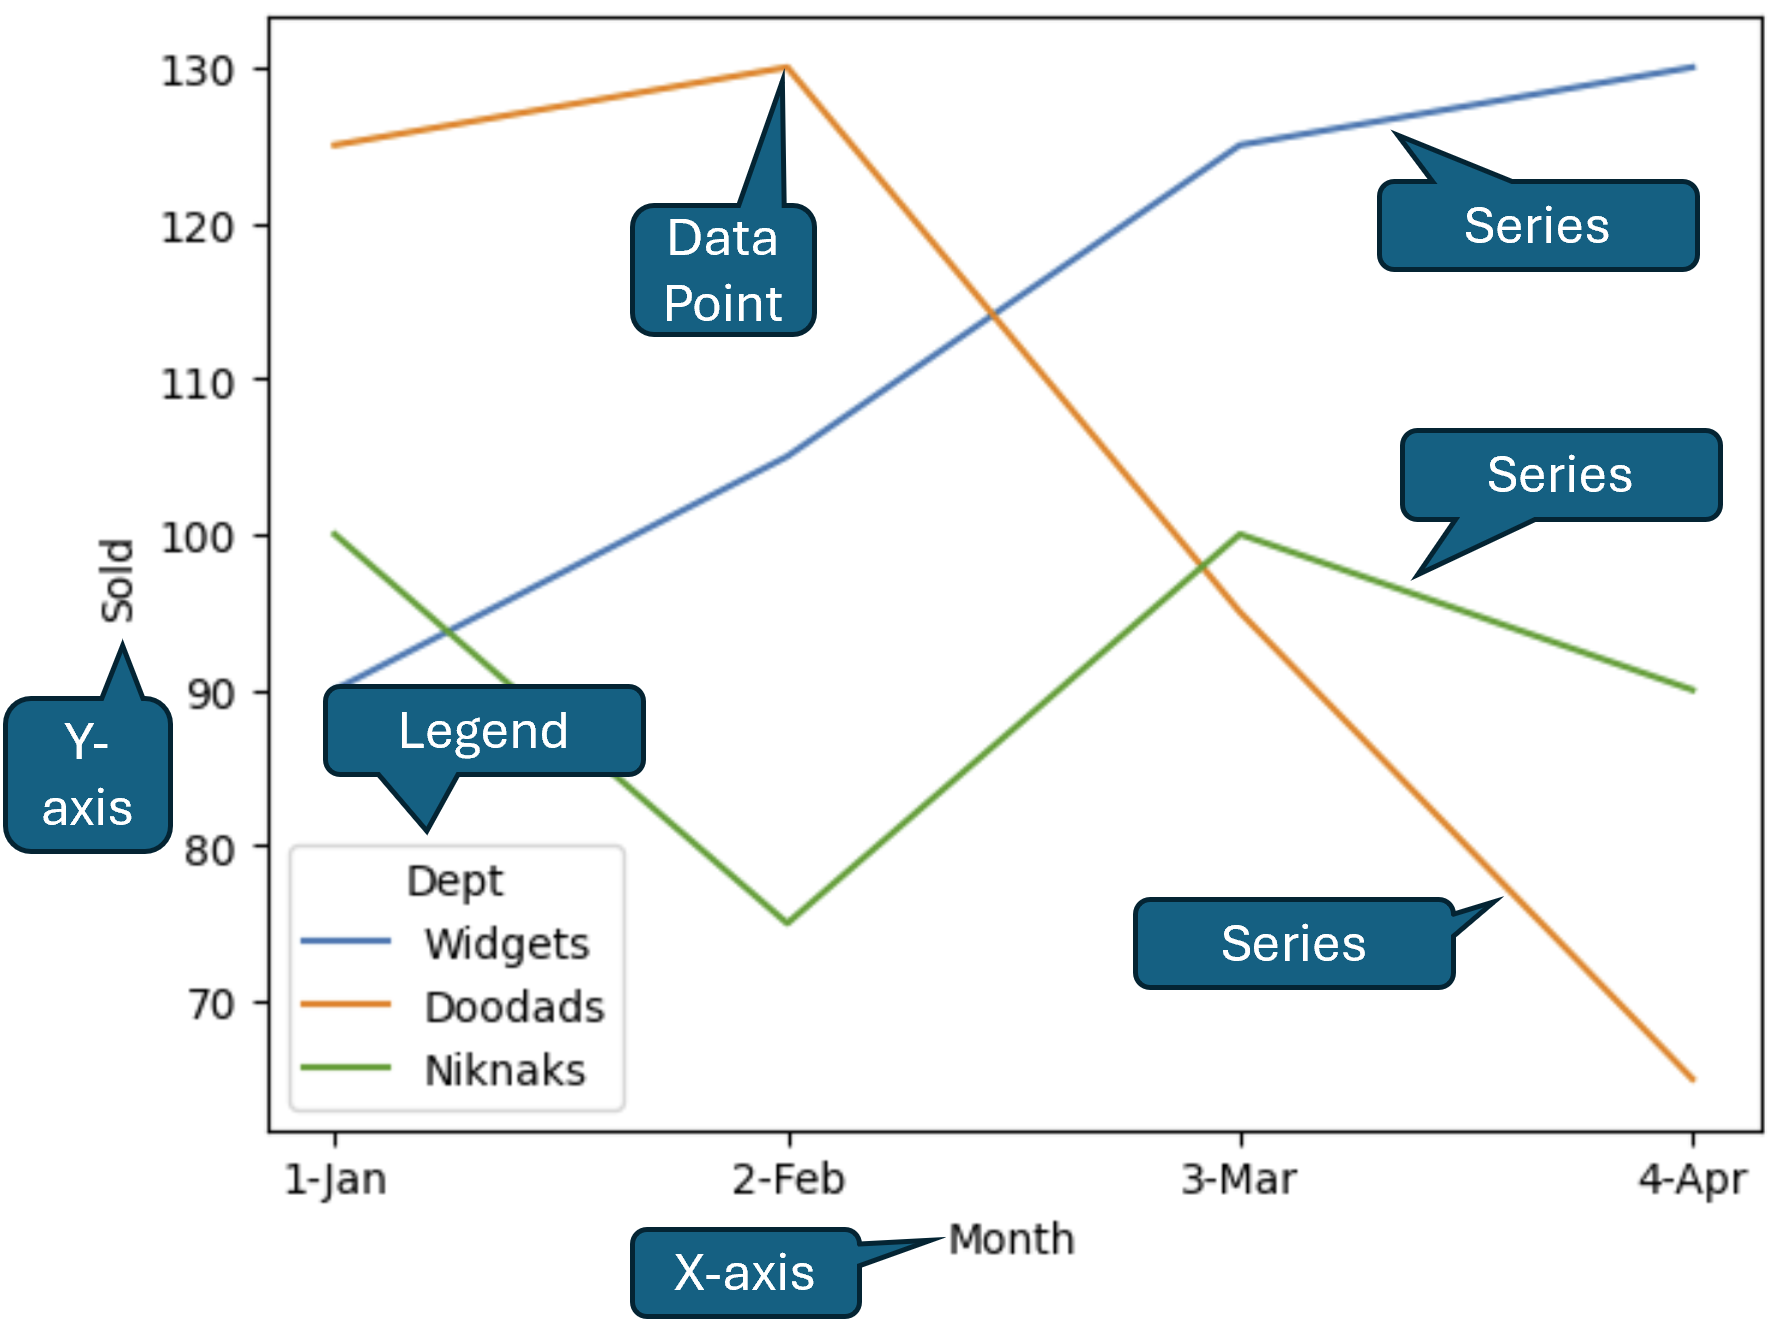](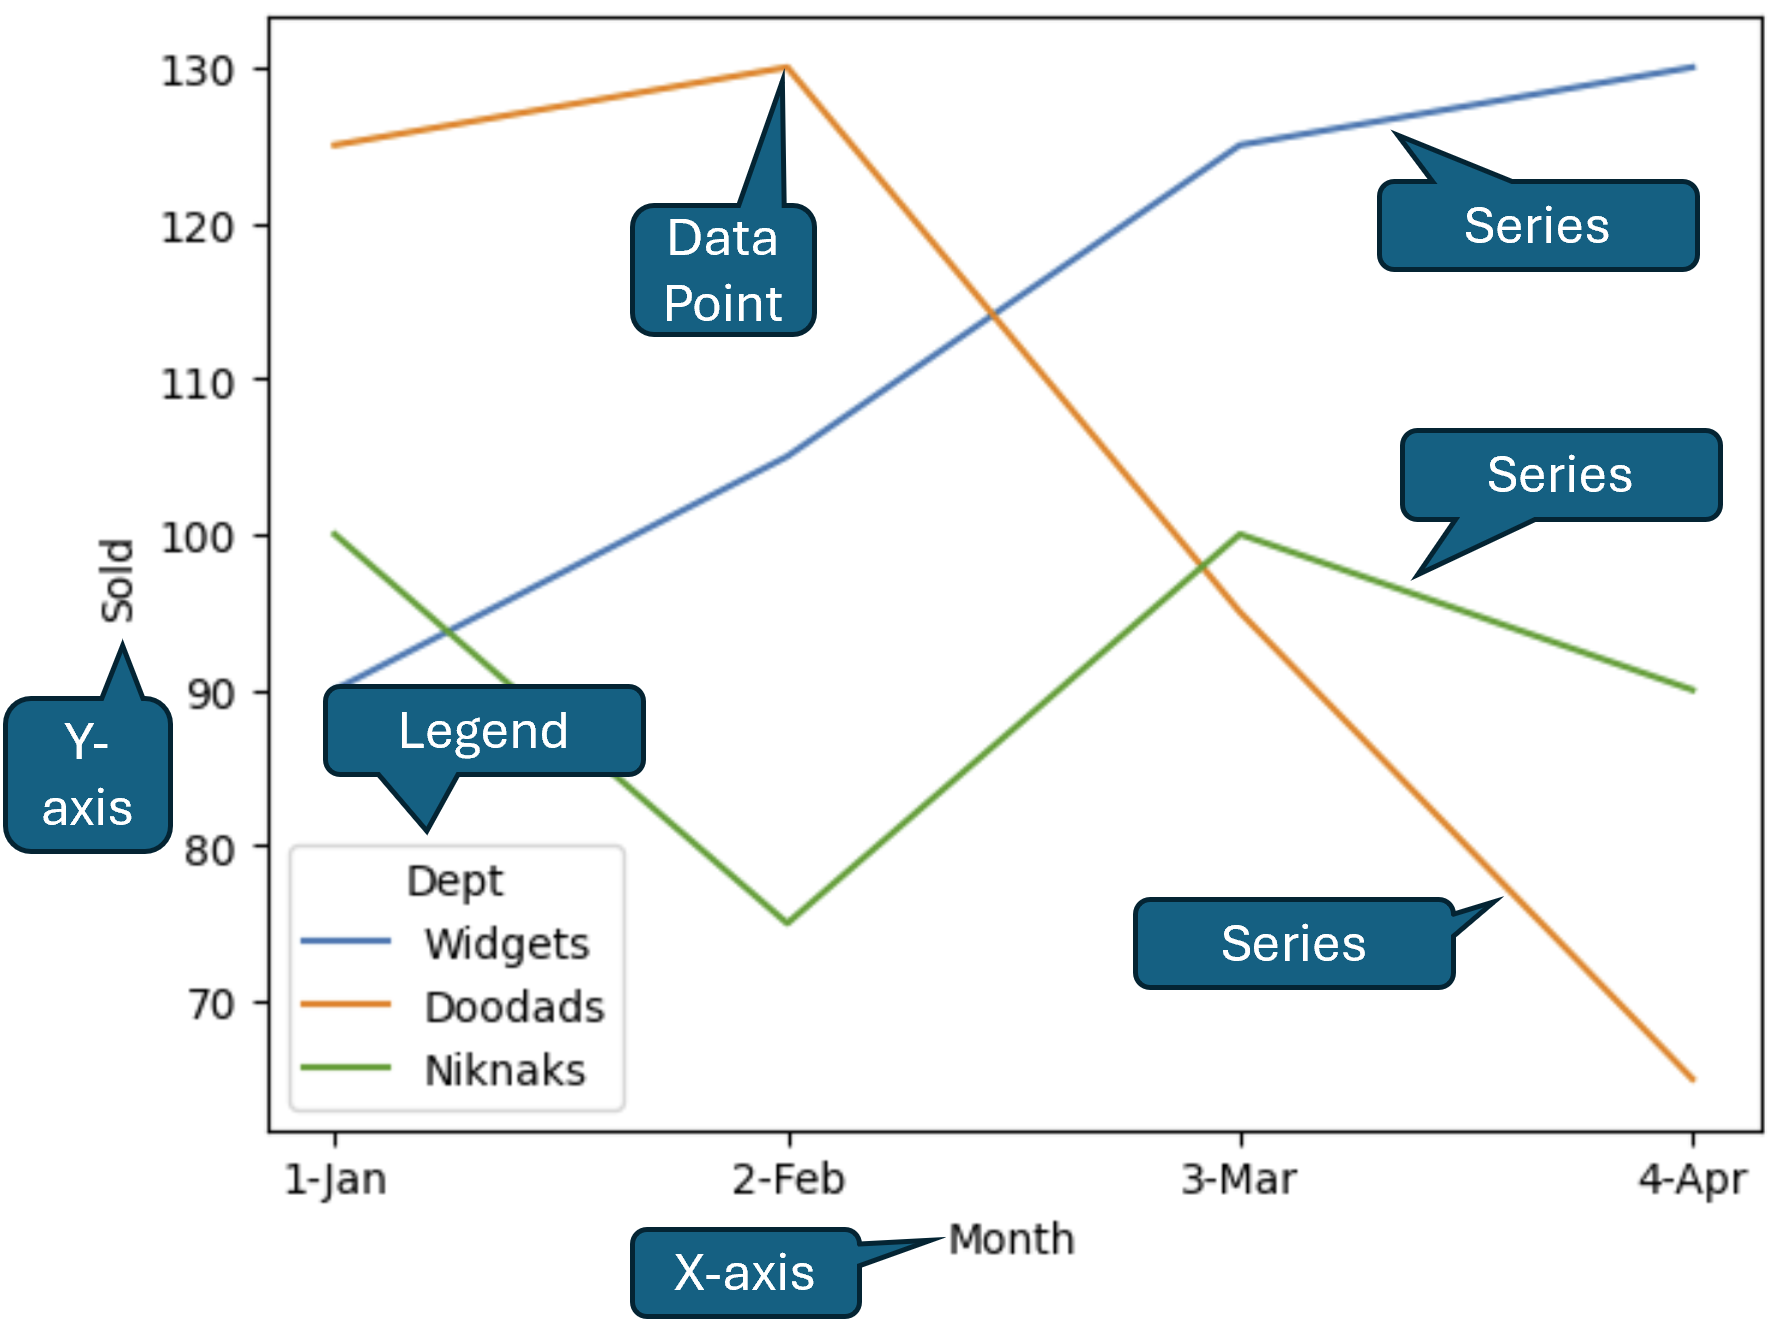)

## Seaborn

Seaborn is a Python data visualization library that provides a simple interface for drawing attractive and informative visuals. Seaborn is the go-to library for statistical graphing, but we will use it here to create simple, one-line-of-code visuals from our Pandas data. Seaborn can do so much more but that's beyond the scope of this unit.

There are comprehensive documentation and examples of how to use it on their website: https://seaborn.pydata.org/

### Importing

First, you must import the Seaborn library. We alias the import as `sns` which is a convention when using it.


In [1]:
import pandas as pd
import seaborn as sns

### Sample Data

We will need some sample data to plot. The following code loads the "Fudge Companies" dataset.  

- `Month` the month: `1-Jan`, `2-Feb`, etc...
- `Dept` is the department: `Doodads`, `Niknaks` or `Widgets`
- `Store` is the company name: `Mikeazon` or `Fudgemart`
- The measureable items are quantities: `Sold`, `Returned` or `Ordered`

In [2]:
# Barplots are use for categorical representations
df = pd.read_csv("https://raw.githubusercontent.com/mafudge/datasets/master/delimited/fudge_companies.csv")
df.sample(5)

,Month,Dept,Store,Sold,Returned,Ordered
8,2-Feb,Doodads,Fudgemart,180,30,50
4,1-Jan,Niknaks,Fudgemart,90,5,20
2,1-Jan,Doodads,Fudgemart,200,0,50
21,4-Apr,Doodads,Mikeazon,100,10,10
15,3-Mar,Doodads,Mikeazon,90,10,10


### Our First Plot: The Bar Plot

**Bar plots are appropriate for visualizing categorical dimensions.**

Before we start our first plot let's poke at the data and get a better idea what we are looking at:

In [3]:
# average Widgets sold
avg_widgets = df[df['Dept'] == 'Widgets']['Sold'].mean()
avg_niknaks = df[df['Dept'] == 'Niknaks']['Sold'].mean()
print("Avg widget", avg_widgets, "Avg niknaks", avg_niknaks)

Avg widget 112.5 Avg niknaks 91.25


This plot shows the average item sold by department.

You can verify yourself that its average sales by checking the output of the code in the cell above to the first and last columns in the graph.

<Axes: xlabel='Dept', ylabel='Sold'>

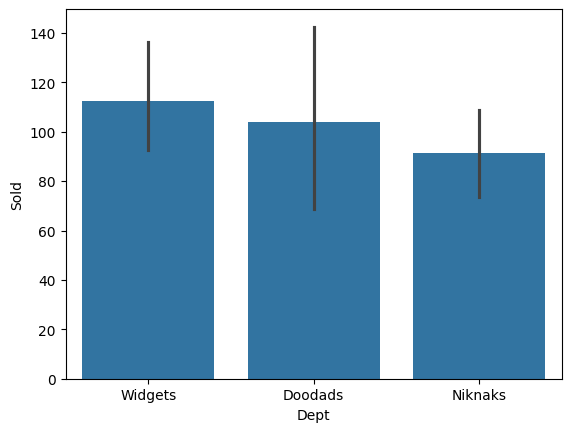

In [4]:
# displays averages and stdev in line
sns.barplot(data=df, x="Dept", y="Sold")

#### What are those? Candle wicks?

Nope. Those black lines are not candle wicks. They're called **error bars** they show the data spread. The shorter the line the closer the data is to the average.


### Estimator and Error Bars

You can disable the error bars with the named argument `errorbar=None`.

Also you can change how the data aggregates by setting the `estimator=` named argument:

- `estimator='average'` average
- `estimator='sum'` sum
- `estimator='count'` count


Here's a bar plot showing total sold. No error bars!


<Axes: xlabel='Dept', ylabel='Sold'>

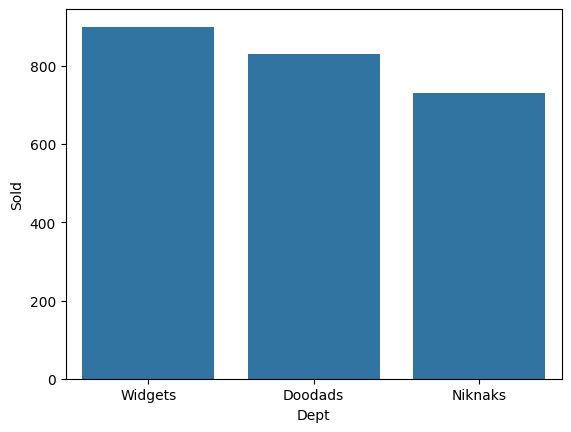

In [5]:
sns.barplot(data=df, x="Dept", y="Sold", estimator="sum",errorbar=None)

### Coloring those bars

This example shows how to use the `hue=` named argument to colorize the bars.

<Axes: xlabel='Dept', ylabel='Sold'>

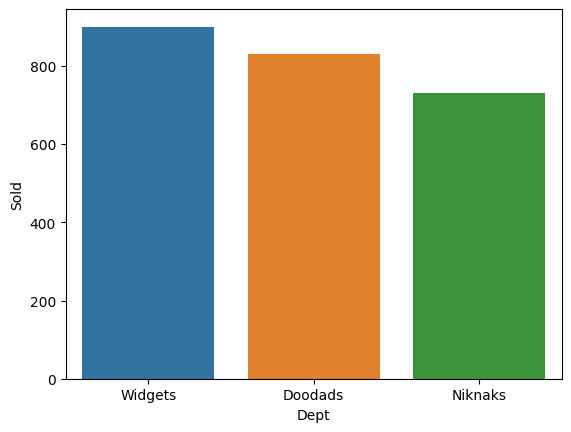

In [6]:
sns.barplot(data=df, x="Dept", y="Sold", estimator="sum",errorbar=None, hue='Dept')

### More to the Hue. Adding series for a 3rd dimension

When you set `hue=` to a different dimension, you get multiple series on your plots. 


This plot shows total sales by department for both Fudgemart and Mikeazon.

<Axes: xlabel='Dept', ylabel='Sold'>

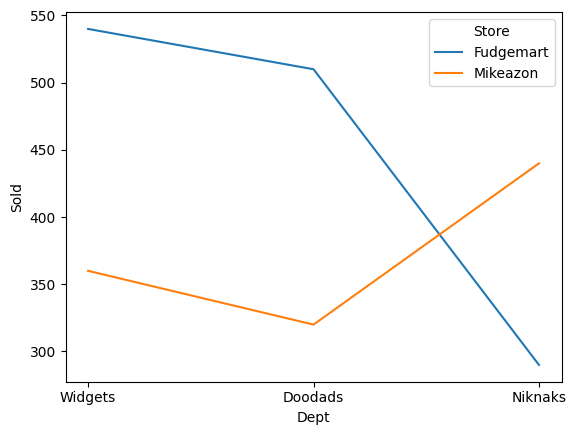

In [30]:
sns.barplot(data=df, x="Dept", y="Sold", estimator="sum",errorbar=None, hue='Store')

Here's the same data, but we've switched the x-axis with the hue/legend.

<Axes: xlabel='Store', ylabel='Sold'>

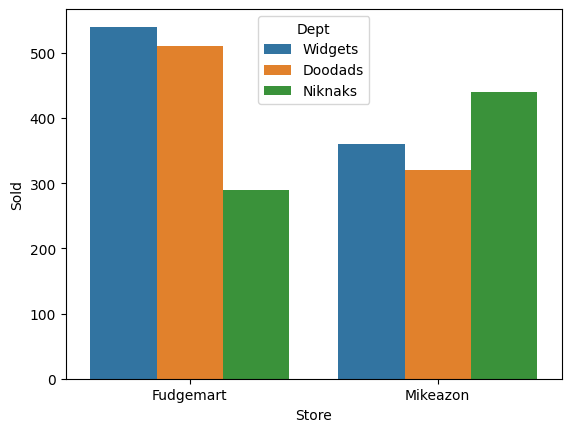

In [8]:
sns.barplot(data=df, x="Store", y="Sold", estimator="sum",errorbar=None, hue='Dept')

## Line Plots

**Line plots are appropriate for visualizing time-oriented dimensions on the x-axis.**

Let's add `Month` to the X-Axis for our our time series, and we will plot sales over time.


<Axes: xlabel='Month', ylabel='Sold'>

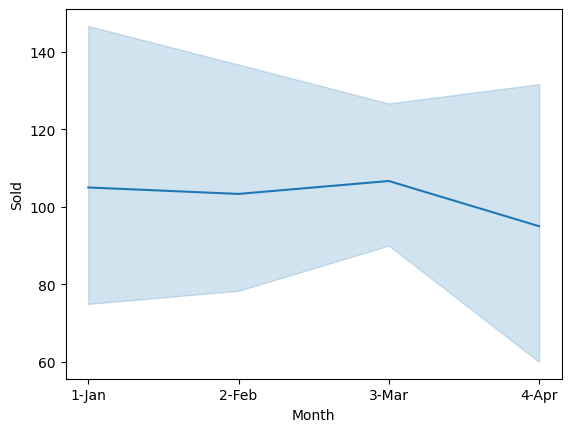

In [9]:
sns.lineplot(data=df, x="Month", y="Sold")

#### errorbars?

Once again we see the `errorbars` in the line context, they represent the standard deviation or spread of the data.   

One way to interpret what you see is the values of `Sold` in `1-Jan` are more spread out than in `3-Mar`.  

Learn more about errorbars here: https://seaborn.pydata.org/tutorial/error_bars.html


### Adding the 3rd dimension

Lines are more interesting when you display an addition dimension to plot multiple series. This way you can compare several facets with the same visual.

For example, this code shows sold by Month with Store in the legend. You can easily see the `Fudgemart` sales trend down over time while the `Mikeazon`sales are slowly trending up.

<Axes: xlabel='Month', ylabel='Sold'>

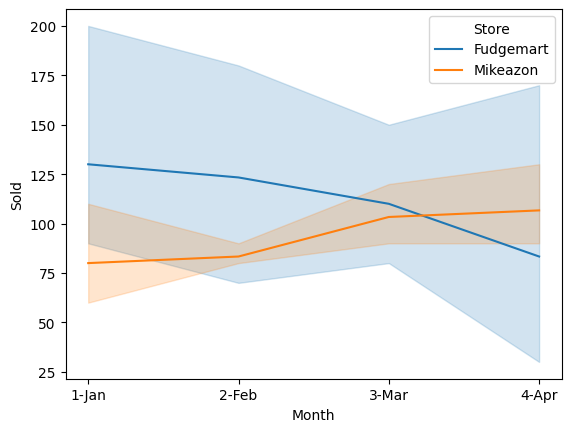

In [10]:
sns.lineplot(data=df, x="Month", y="Sold", estimator="average", hue="Store")

### Removing errorbars for clarity

Here's another line plot.  

This one is Sold by Month, but now shows Department as the legend. This way we can compare sales of each different department over time.

The named argument `errorbar=None` is added to remove the spread, making the plot easier to view. 

Sales of `Doodads` are falling fast!

<Axes: xlabel='Month', ylabel='Sold'>

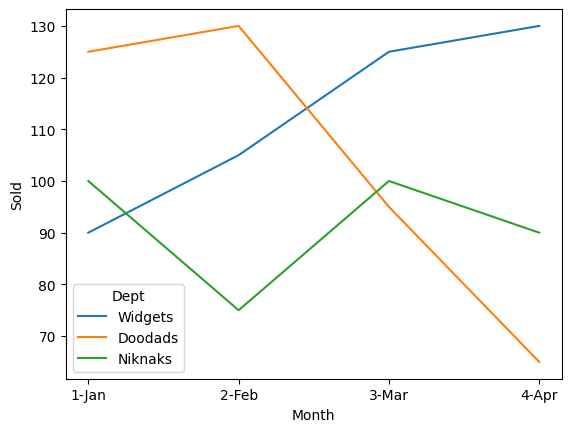

In [11]:
# Here's what it looks like by department

sns.lineplot(data=df, x="Month", y="Sold", estimator="average", hue="Dept", errorbar=None)

same plot with the `errorbars` on. Kind of messy!!!

<Axes: xlabel='Month', ylabel='Sold'>

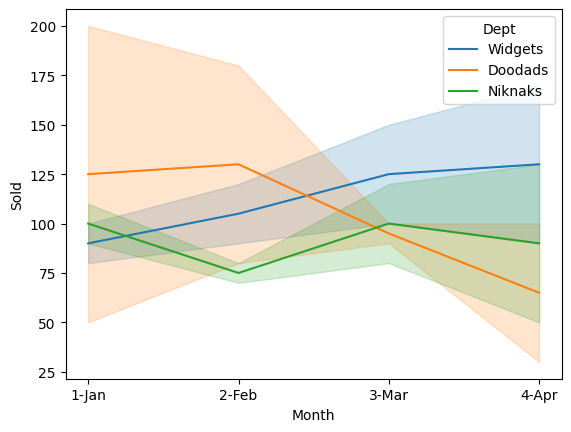

In [12]:
sns.lineplot(data=df, x="Month", y="Sold", estimator="average", hue="Dept")

Heres the same plot, but the measured value is `Returned` instead of `Sold`

Something is up with the `Doodads` sales are falling and returns are rising!

<Axes: xlabel='Month', ylabel='Returned'>

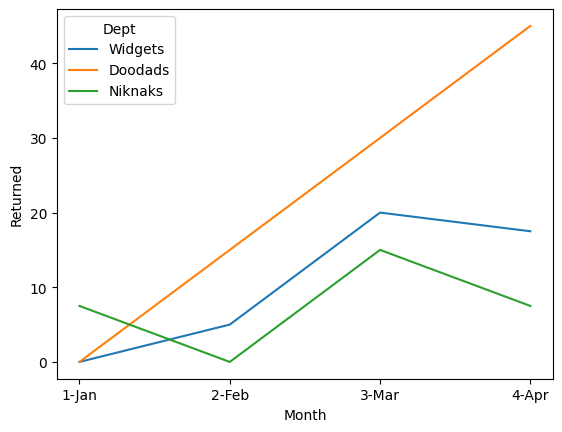

In [13]:
sns.lineplot(data=df, x="Month", y='Returned', estimator="average", hue="Dept", errorbar=None)

## Scatter Plots

**Scatter plots are appropriate for visualizing how two numerical values compare to each other.**

What does the relationship between `Sold` and `Ordered` look like? For example for any `Month`, `Dept` and `Store` is there a data relationship between the two?

It would seem like the more you sell, the more you order, right?

At first glance, it doesn't look very interesting at all. Scatter plot? More like scatter-brained!

<Axes: xlabel='Sold', ylabel='Ordered'>

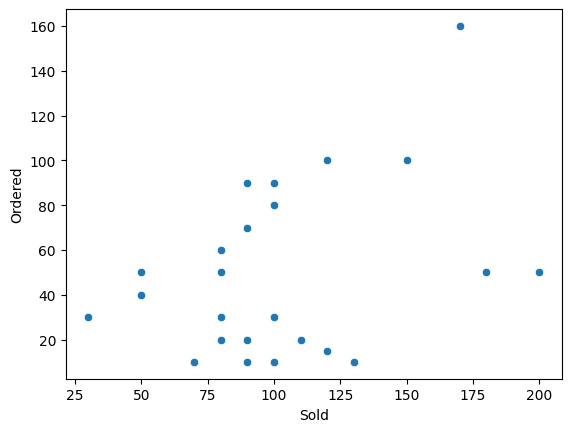

In [14]:
sns.scatterplot(data=df, x="Sold", y='Ordered')

It can be hard to see the patterns in a scatter, but when they are obvious the will jump right out. When patterns are not-so obvious, adding a regression helps, as we will see in the next section.

### Adding the 3rd dimension to the scatter.

Let's identify the dots by `Dept`. Now you can see some patterns. For example for `Widgets` the as the sales go up, so do the orders.

<Axes: xlabel='Sold', ylabel='Ordered'>

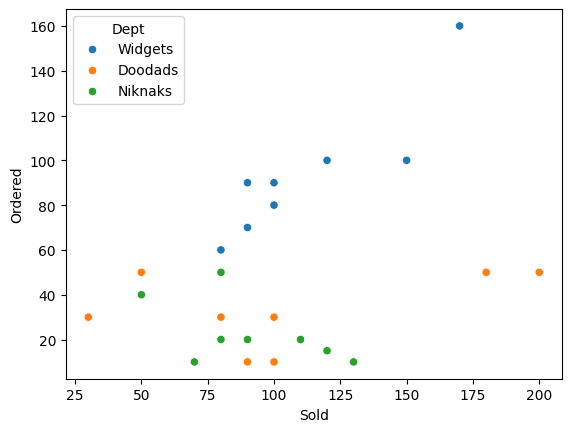

In [15]:
#once again we can add a 3rd dimension....
sns.scatterplot(data=df, x="Sold", y='Ordered', hue="Dept")

### Finding trends in your scatters

To help us see the patterns in our scatters, we can add a trendline with spread. 

In this case the spread is the average distance the points are from the line. The smaller the shaded area, the stronger the relationship.

This relationship is called a **correlation** and line is called a **linear regression**

We use `lmplot()` to add the trendline and spread to our scatter.  

Here you can see there is a weak relationship between sales and orders.

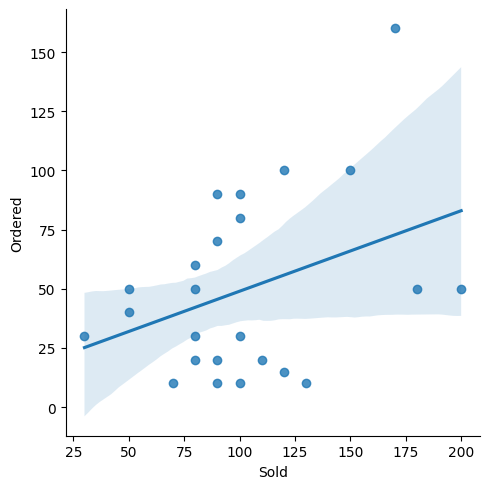

In [16]:
sns.lmplot(data=df, x="Sold", y='Ordered')

### Data Storytelling

Oftentimes when you're analyzing a dataset you need to explore several visualizations before you discover something interesting. This is the very first step in data storytelling. Writing code to discover the story to tell. 

For example take a look at this visualization. Does it tell you anything interesting?


**Answer** Seems like our company is doing their job. As sales increase we are reordering to replenish inventory. In addition when sales fall as in the `Mikeazon` case we order less. The spread is wide, which can be interpreted as we could do this better. 

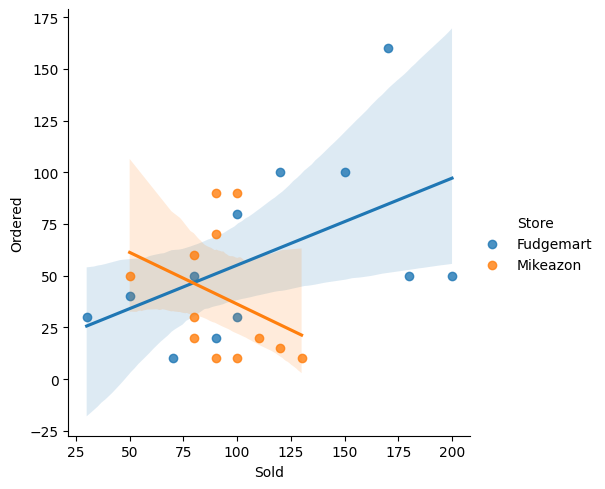

In [17]:
sns.lmplot(data=df, x="Sold", y='Ordered', hue="Store")

## Histograms 

**Histograms are used to count frequencies across a single numerical measure.**

For example we might want to know what occurs more often: `Returned` values that are low or high? 

The histogram answers this question.

In the following `histplot()` we see that there are 10 returns of < 10 items.


<Axes: xlabel='Returned', ylabel='Count'>

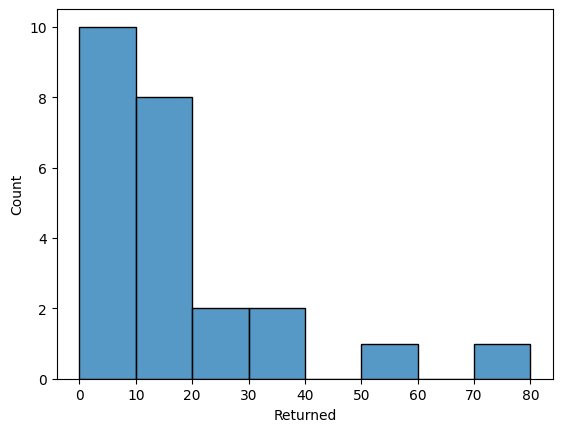

In [18]:
sns.histplot(data=df, x="Returned")

### Histograms show how the data in the dimension are distributed

You can turn on the **kernel density estimate** to provide a trendline that follows the distribution. This will help you to better get a sense for the data distribbution model that best represent the data. 

Some common data distributions can be found here:  https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm



<Axes: xlabel='Returned', ylabel='Count'>

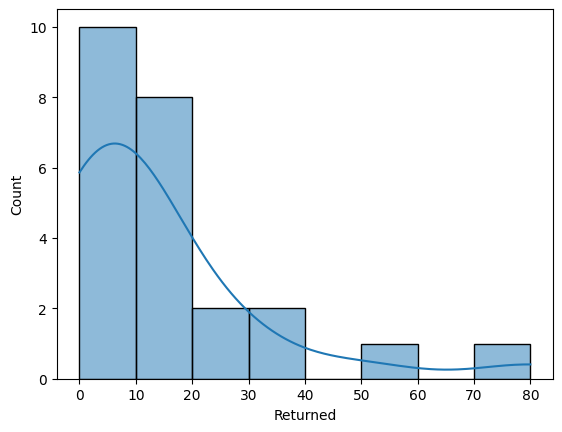

In [19]:
sns.histplot(data=df, x="Returned", kde=True)

## IPywidgets and Visualizations

Its easy to integrate your visual with `@interact_manual`, You can make widgets for the selection of different parts of the visual as well as other settings.

In this example you are not only allowed to select the X-Axis, Y-Axis, and Hue, but also which color pallette for displaying the visualization.

Its important to note, that we need to assign the plot to a variable and then use the `display()` function to show the Visualization.

In [20]:
from IPython.display import display, HTML
from ipywidgets import interact_manual

yvalues = ['Sold', 'Returned', 'Ordered']
xvalues = ['Month', 'Dept', 'Store']
huevalues = ['Month', 'Dept', 'Store']
palettes = ['pastel', "bright", "dark", "colorblind", "Paired", "flare", "Blues", "Spectral"]


@interact_manual(x=xvalues, y=yvalues, hue=huevalues, palette=palettes)
def onclick(x, y, hue, palette):
    title = f"Average {y} by {x}"
    plot = sns.barplot(data=df, x=x, y=y, hue=hue, estimator="average", errorbar=None, palette=palette)
    display(HTML(f"<h4>{title}</h4>"))
    display(plot)

interactive(children=(Dropdown(description='x', options=('Month', 'Dept', 'Store'), value='Month'), Dropdown(d…

## Map Visualizations with Folium

To create map visualizations, we will use the Folium library.

https://python-visualization.github.io/folium/latest/   

Folium uses https://www.openstreetmap.org/ for drawing maps. Its a free/open source alternative to a service like Google Maps.

Before we can use folium, we must import it:

In [21]:
import folium

### Making maps

Making maps is easy. All you need is a starting point to center the map. This is in the form of a latitude and longitude in [Decimal Degrees format](https://en.wikipedia.org/wiki/Decimal_degrees), or DD.

**Note** A website like  https://latitude.to/ can help you to find the coordinates of a place in DD format. Later in the course you'll learn how to do this using code, a process known as **geocoding**.

Here, we make a map centered on the Schine Student Center on the SU Campus

The map is intractive. You can drag the map to move it around, and click the `+` or `-` to zoom in/out.


In [22]:
schine = (43.03996, -76.13364)
m = folium.Map(location=schine)
m

### Zooming in on the map

This map is too far out. We can zoom in using the `zoom_start=` named argument, which takes a value from 0 to 18, with 18 being the most zoomed in.  


In [23]:
schine = (43.03996, -76.13364)
m = folium.Map(location=schine, zoom_start=17)
m

### Map Markers

There are many ways data can be visualized on a map, but here we will limit to markers.

The process is simple:

1. create the map
2. create the marker
3. add the marker to the map
4. display the map

For multiple markers you simply repeat steps 2. and 3.

Here we add two markers to the map one for JMA wireless and the other for Schine.

`popup=` displays when you click the marker  
`tooltip=` displays when you hover over the marker



In [24]:
jma = (43.03617, -76.13636)
schine = (43.03986, -76.13375)
m = folium.Map(location=schine, zoom_start=17)
jma_marker = folium.Marker(location=jma, tooltip="JMA", popup="JMA Wireless Dome")
jma_marker.add_to(m)
folium.Marker(location=schine, tooltip="Schine", popup="Schine Student Center").add_to(m)
m

### Map Markers Colors and Icons

Through the `icon` named argument you can assign an icon to the popup. You must create a `folium.Icon()` to assign a custom icon. There are three named arguments:

`color=` the color of the marker
`icon_color=` the color of the icon on the marker
`icon=` the name of the icon.


Valid colors are: `['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']`

Valid icons can be found here: https://fontawesome.com/v4/icons/ Your mileage may vary here as not all the icons listed are available.


In [25]:
jma = (43.03617, -76.13636)
schine = (43.03986, -76.13375)
m = folium.Map(location=schine, zoom_start=17)
jma_marker = folium.Marker(location=jma, tooltip="JMA", popup="JMA Wireless Dome", icon=folium.Icon(color="orange", icon="globe"))
jma_marker.add_to(m)
folium.Marker(location=schine, tooltip="Schine", popup="Schine Student Center", icon=folium.Icon(color="darkblue", icon="camera")).add_to(m)
m

### Datasets ready for mapping

If you want put your data on a map, you will need DD coordinates in your data. For example take a look at the course schedule provided.

If you do not have DD coordinates, but you do have a location or landmark you can try to geocode the DD coordinates from the landmark/location. We will learn how to do this in the final unit.

In [26]:
import pandas as pd
classesdf = pd.read_csv("https://raw.githubusercontent.com/mafudge/datasets/master/delimited/class-schedule.csv")
classesdf

,Course,Day,Time,Building,Room,Lat,Lon
0,IST256,M,3:45pm,HBC,Gifford,43.03819,-76.13413
1,MAT221,TuTh,12:45pm,Bowne,104,43.03674,-76.13320
2,WRT206,MW,9:20am,Crouse,111,43.03852,-76.13676
3,COM222,TuTh,9:20am,NH II,232,43.04020,-76.13521
4,IST343,MW,2:15pm,Hinds,243,43.03834,-76.13364


### Mapping your data

You will need to for loop over your dataframe to map the data. The algorithm is always the same:

    1. create map
    2. for each row in your dataframe
    3.    create a marker from the row data
    4.    add the marker to the map
    5. show the map
    
This example shows the class schedule as a map colors represent days of the week. MW or Tu/Th


In [27]:
schine = (43.03986, -76.13375)
m = folium.Map(location=schine, zoom_start=17)

for index, row in classesdf.iterrows():
    text = f"{row['Course']} {row['Day']} {row['Time']} {row['Building']}"
    dd = (row['Lat'], row['Lon'])
    if row['Day'] == "TuTh":
        markercolor = 'orange'
    else:
        markercolor = 'darkblue'
    marker = folium.Marker(location=dd, popup=text, icon = folium.Icon(color = markercolor))
    marker.add_to(m)
m

### Interact with maps

Building interacts with your maps is easy. Similar to Seaborn you must use the `display()` function to show your map in code.


This example allows you to choose your course. It then zooms the map in on the building and shows information about the course

In [29]:
from IPython.display import display, HTML
from ipywidgets import interact_manual

courses = sorted(list(classesdf['Course'].dropna().unique()))

@interact_manual(course=courses)
def onclick(course):
    filter_df = classesdf[ classesdf['Course'] == course ]
    row = filter_df.to_dict(orient="records")[0]
    text = f"{row['Course']} {row['Day']} {row['Time']} {row['Building']}"
    dd = (row['Lat'], row['Lon'])
    m = folium.Map(location=dd,zoom_start=20)
    if row['Day'] == "TuTh":
        markercolor = 'orange'
    else:
        markercolor = 'darkblue'
    marker = folium.Marker(location=dd, popup=folium.Popup(text, show=True), icon = folium.Icon(color = markercolor))
    marker.add_to(m)
    display(m)

interactive(children=(Dropdown(description='course', options=('COM222', 'IST256', 'IST343', 'MAT221', 'WRT206'…